# Import Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load Dataset

In [2]:
X,y = make_classification(
                            n_samples=100
                            ,n_features=2
                            ,n_informative=1
                            ,n_redundant=0
                            ,n_clusters_per_class=1
                            ,random_state=42
                            )

Text(0, 0.5, 'coluna 2')

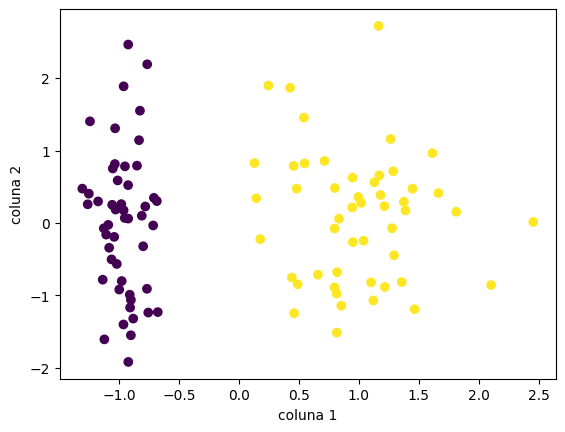

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('coluna 1')
plt.ylabel('coluna 2')

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 2.0 Decision Boundary

In [6]:
theta_0 = model.intercept_[0]
theta_1, theta_2 = model.coef_.T

In [7]:
c = -theta_0/theta_2
m = -theta_1/theta_2

In [8]:
np.max(X_train)
np.max(X_train)

2.720169166589619

In [9]:
xmin , xmax = -1.6, 2.7
ymin,ymax = -1.6, 3.0

xd = np.array([xmin,xmax])
yd = m*xd+c

(-2.6, 3.0)

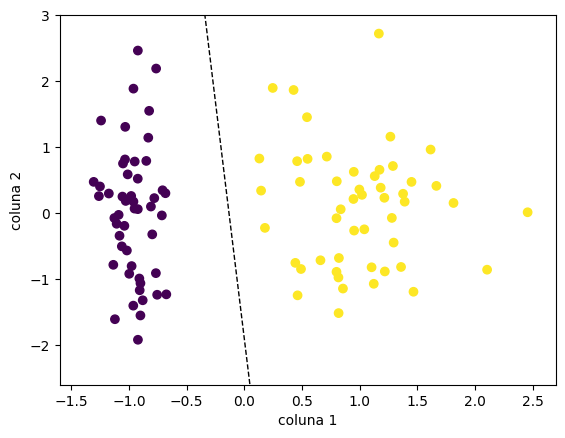

In [10]:
plt.plot(xd,yd,'k',lw=1,ls='--')
#plt.fill_between(xd,yd,ymin,color='blue',alpha=0.2)
#plt.fill_between(xd,yd,ymax,color='orange',alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('coluna 1')
plt.ylabel('coluna 2')

plt.xlim(xmin,xmax)
plt.ylim(ymin-1,ymax)

# 3.0 Decision Boundary Probability

In [11]:
xx, yy = np.mgrid[-2:2.5:.01, -2:3:.01]

grid = np.c_[xx.ravel(), yy.ravel()]

In [12]:
probs = model.predict_proba(grid)[:,1].reshape( xx.shape )

[None,
 (-2.0, 2.5),
 (-2.0, 3.0),
 Text(0.5, 0, 'coluna 1'),
 Text(0, 0.5, 'coluna 2')]

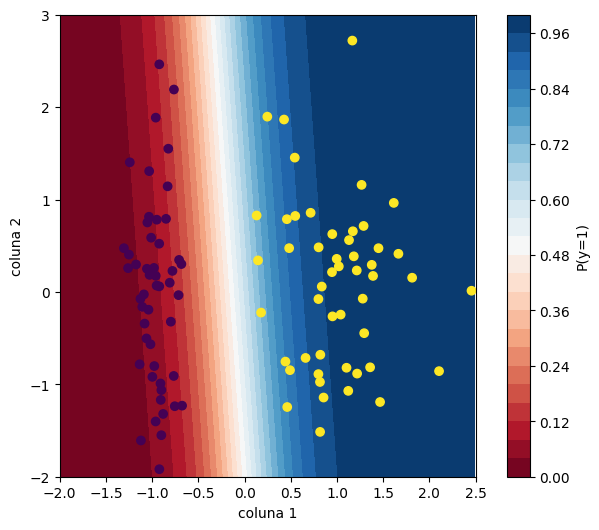

In [14]:
f, ax = plt.subplots(figsize=(8,6))

countour = ax.contourf(xx,yy,probs,25,cmap='RdBu', vmin=0, vmax=1)

ax_c = f.colorbar( countour )
ax_c.set_label( "P(y=1)" )

ax.scatter(X[:,0],X[:,1],c=y)

ax.set(
    aspect='equal'
    ,xlim=(-2,2.5)
    ,ylim =(-2,3)
    ,xlabel=('coluna 1')
    ,ylabel=('coluna 2')
)